<a href="https://colab.research.google.com/github/sergioarnold87/Caso_Practico_HealthCare_IA/blob/main/HealthCare_Sergio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1  Entender el enunciado del problema y el caso práctico

![alt text](https://drive.google.com/uc?id=1GAWfaucw0yYWOvVFHCvPUAIe87sqRxAd)

![alt text](https://drive.google.com/uc?id=1mR5yqG3DTryYlUELiGKn4GBaSmEZng_-)

![alt text](https://drive.google.com/uc?id=15G1y2Cs6nHtdM25gfwjyKDpGwVr7A10_)

- Fuente original: https://www.kaggle.com/mateuszbuda/lgg-mri-segmentation
- Clickable link for the full list of startups in AI medical imagery: https://research.aimultiple.com/looking-for-better-medical-imaging-for-early-diagnostic-and-monitoring-contact-the-leading-vendors-here/

![alt text](https://drive.google.com/uc?id=1aq_9XV_rX7DCNXPGMkMh8QLRnMmdDcD_)

![alt text](https://drive.google.com/uc?id=1CMPW0u1Lq5aNrJX3uffBIrLAoPOtUTtE)

![alt text](https://drive.google.com/uc?id=1uP9hs79W-1yTLVbEKdLMdi7Bb4c1HN9P)

# 2: IMPORTAR LIBRERÍAS Y DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
from google.colab import files #Librería para cargar ficheros directamente en Colab
%matplotlib inline

In [2]:
# Necesitaremos montar su disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, puedes consultar: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Navegamos hasta el directorio My Drive para almacenar el conjunto de datos y herramientas adicionales
%cd /content/drive/MyDrive/Healthcare+AI+Datasets/Brain_MRI


/content/drive/MyDrive/Healthcare+AI+Datasets/Brain_MRI


In [5]:
# Datos que contienen la ruta a Brain MRI y su máscara correspondiente
brain_df = pd.read_csv('data_mask.csv')

![alt text](https://drive.google.com/uc?id=1UhYwK8wILbDn2DhXExrpZz_i5oXTbIp6)

In [6]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [7]:
brain_df.head(50)

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0
5,TCGA_CS_5395_19981004,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1.tif,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1_...,0
6,TCGA_CS_5395_19981004,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1.tif,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1_...,0
7,TCGA_CS_5395_19981004,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1_...,0
8,TCGA_CS_5395_19981004,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1.tif,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1_...,0
9,TCGA_CS_5395_19981004,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1.tif,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1_...,0


In [8]:
brain_df.mask_path[1] # Ruta a la imagen de la MRI

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

In [9]:
brain_df.image_path[1] # Ruta a la imagen de segmentación

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

MINI RETO #1:
  - ¿Tenemos un dataset balanceado? 
  - ¿Cuantas muestras están marcadas como 'paciente sano'?

In [10]:
brain_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

# 3: VISUALIZACIÓN DE DATOS

In [11]:
brain_df

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0
...,...,...,...,...
3924,TCGA_DU_6401_19831001,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...,0
3925,TCGA_DU_6401_19831001,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...,0
3926,TCGA_DU_6401_19831001,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...,0
3927,TCGA_DU_6401_19831001,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...,0


In [12]:
brain_df['mask'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [13]:
# Usaremos plotly para hacer un diagrama de barras interactivo
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = brain_df['mask'].value_counts().index, y = brain_df['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

In [14]:
brain_df.mask_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: mask_path, Length: 3929, dtype: object

In [15]:
brain_df.image_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: image_path, Length: 3929, dtype: object

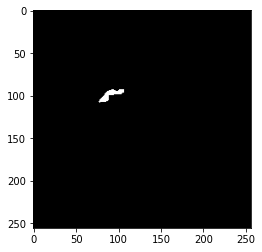

In [16]:
plt.imshow(cv2.imread(brain_df.mask_path[623]))

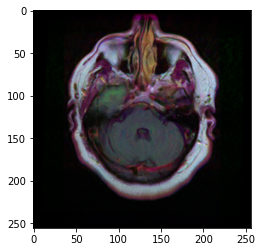

In [17]:
plt.imshow(cv2.imread(brain_df.image_path[623]))

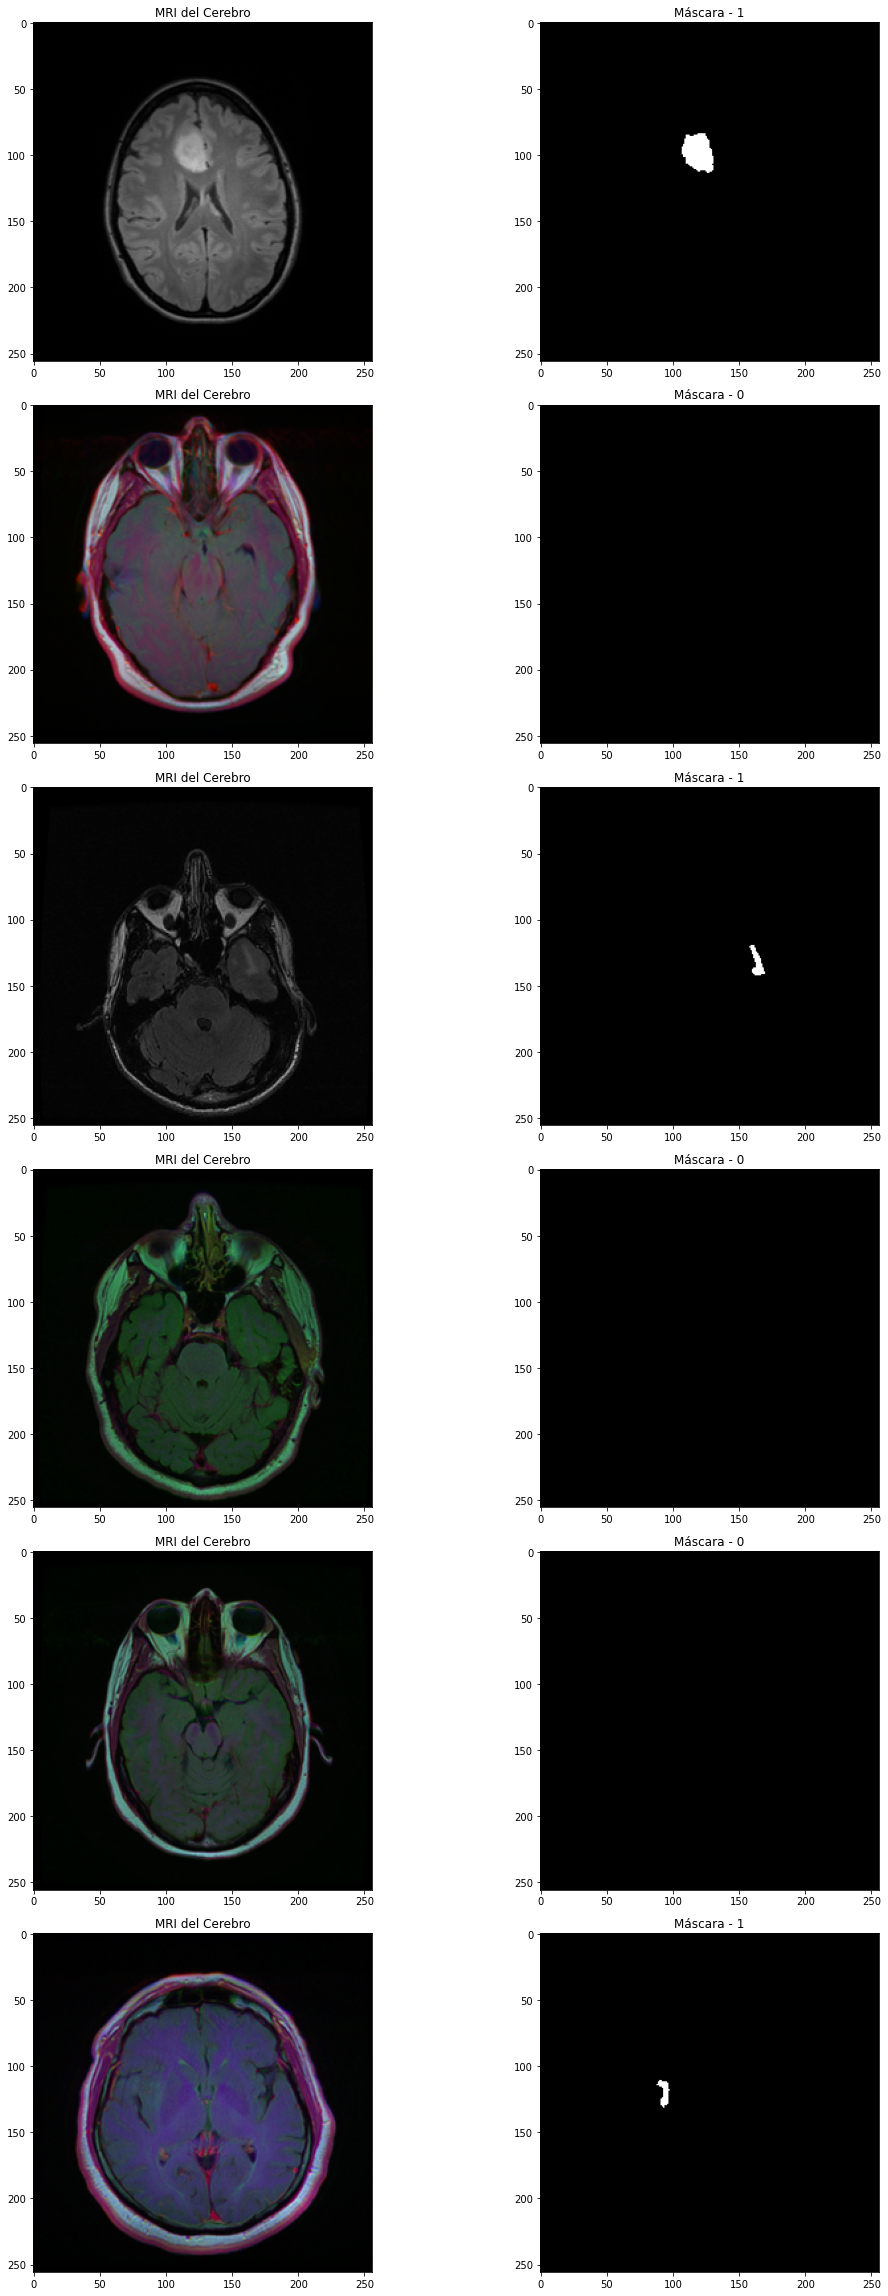

In [18]:
# Visualización básica Visualizaremos imágenes (MRI y Máscaras) en el dataset de forma separada
import random
fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) # Seleccionamos un índice aleatorio 
  axs[count][0].title.set_text("MRI del Cerebro") # Configuramos el título
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # Mostramos la MRI
  axs[count][1].title.set_text("Máscara - " + str(brain_df['mask'][i])) # Colocámos el título en la máscara (0 o 1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # Mostramos la máscara correspondiente
  count += 1

fig.tight_layout()


MINI RETO #2: 
 - Representar aleatoriamente 12 (1) imágenes de  MRI seleccionadas aleatoriamente de entre los pacientes enfermos seguidas de (2) su correspondiente máscara, (3) tanto la imágen de la MRI junto con su máscara (de color rojo) una encima de la otra.

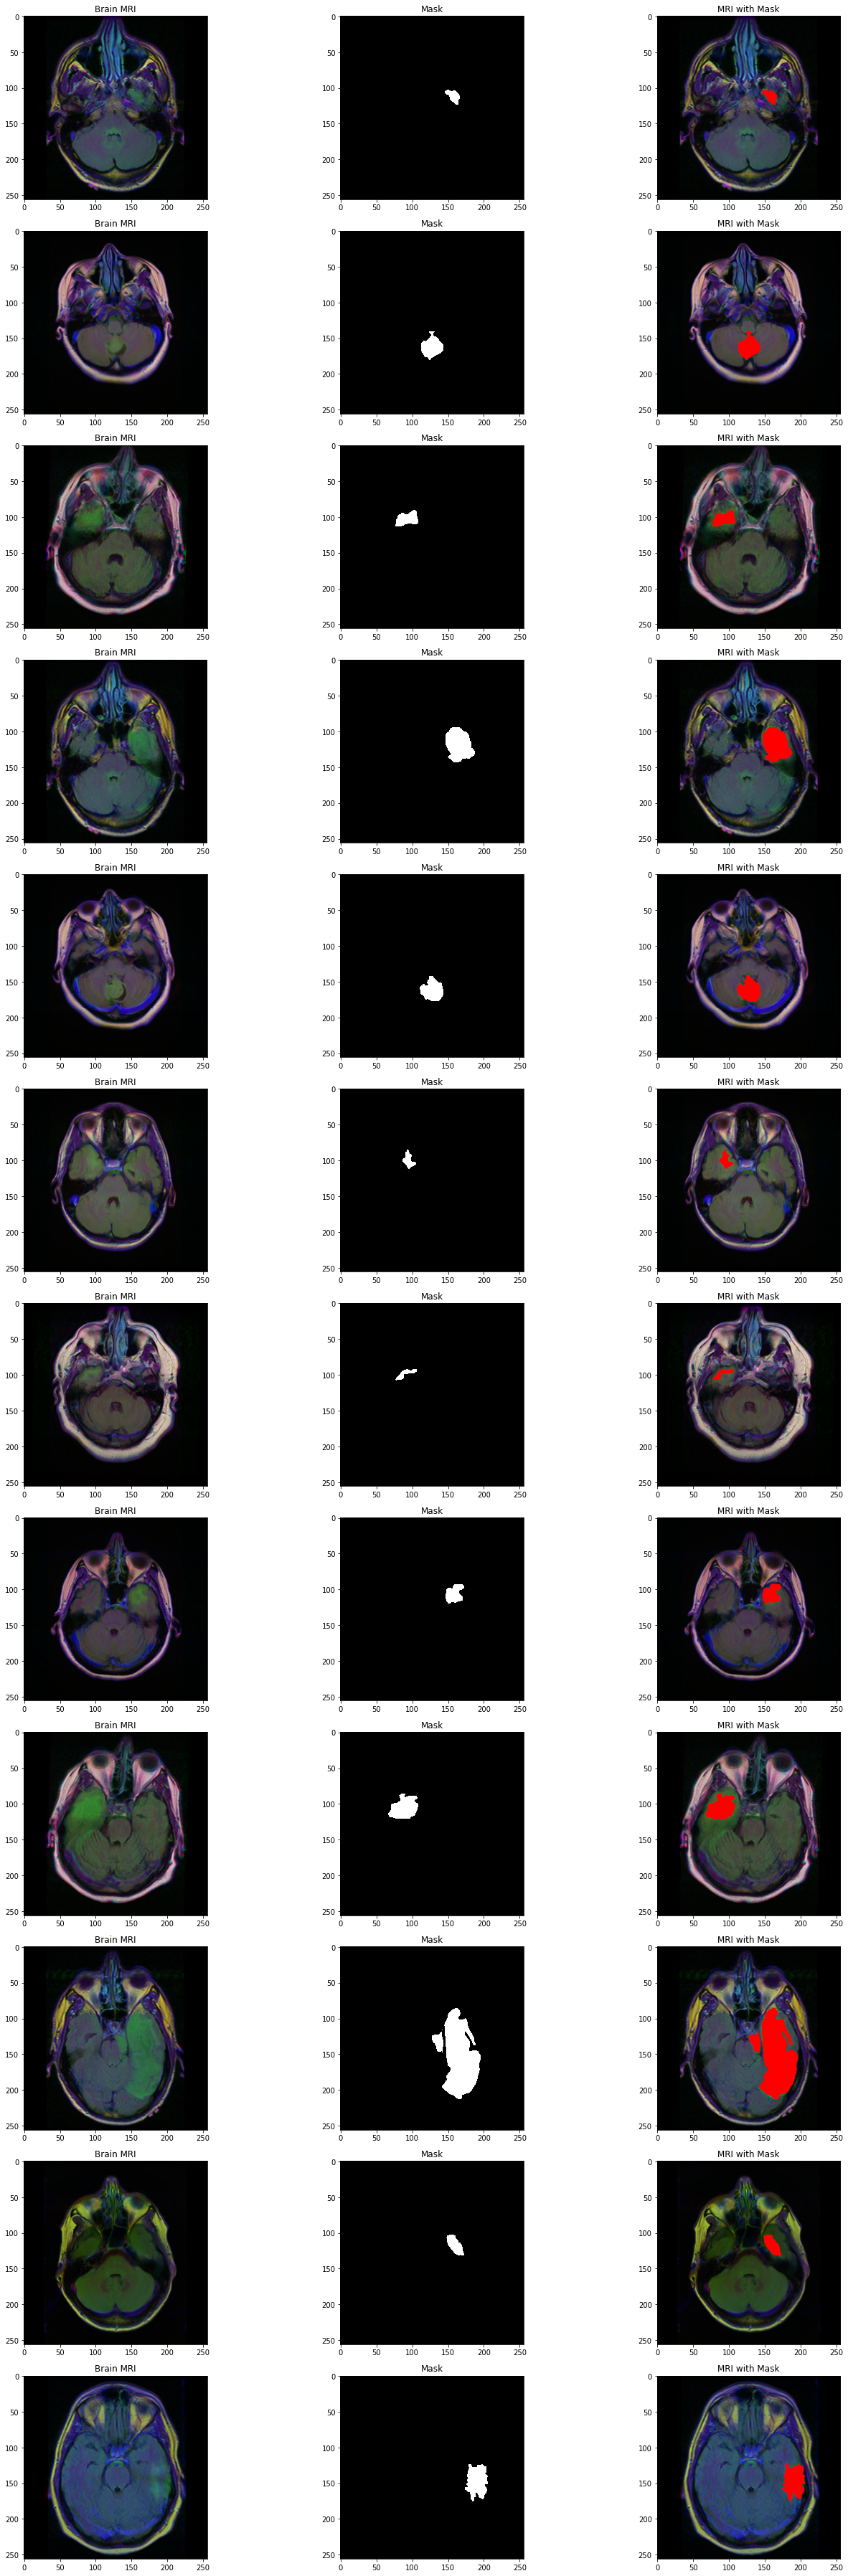

In [19]:
# Visualización avanzada: visualiza las imágenes por resonancia magnética junto con su máscara en una imagen
count = 0
fig, axs = plt.subplots(12,3, figsize = (20, 50))
for i in range(len(brain_df)):
  if brain_df['mask'][i] == 1 and count < 12:
    # Leemos las imágenes
    img = io.imread(brain_df.image_path[i])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # Obtener la máscara para la imagen
    mask = io.imread(brain_df.mask_path[i])
    axs[count][1].title.set_text("Mask")
    axs[count][1].imshow(mask, cmap = 'gray')

    # Reemplazar los valores en la imagen con color rojo (255,0,0) si algún píxel de máscara era = 255
    img[mask == 255] = (255,0,0)
    axs[count][2].title.set_text("MRI with Mask")
    axs[count][2].imshow(img)
    count += 1

fig.tight_layout()


#4: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LAS REDES NEURONALES Y RESNETS CONVOLUCIONALES

![alt text](https://drive.google.com/uc?id=1Y9hpqFFGAIXtzVmHi49zCIYTERrff1K3)

- Feature Extraction and Convolutions: https://setosa.io/ev/image-kernels/
- CNN Visualization: https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html


![alt text](https://drive.google.com/uc?id=1nf65LNkurgUBqx8kU00FIgInMwHkJmR2)

- Link al paper de ResNets (Deep Residual Learning for Image Recognition): https://arxiv.org/pdf/1512.03385.pdf

MINI RETO #3: 
- ¿Cuál es el rendimiento de ResNet en el conjunto de datos ImageNet? 
- Explora otras arquitecturas de RNC como AlexNet y enumera su rendimiento en comparación con ResNet (se requiere investigación externa)

- Un conjunto de estas redes residuales alcanza un error del 3,57%
en el conjunto de test de ImageNet.
- Solución (buen artículo de Siddharth Das): https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5

# 5: Entender la Teoría y la intuición detrás del Aprendizaje por Transferencia.

![alt text](https://drive.google.com/uc?id=1Xj4c5U-cRQVnv38J_i-3J9IOHA0EG1nb)

![alt text](https://drive.google.com/uc?id=1fnfO27T6vlR0rWTPj41sm5fDwZXXo0Gs)

![alt text](https://drive.google.com/uc?id=1316MR8iufOwjiJD6vk9vIgwtepLNNCE0)

- Excelente recurso sobre transferencia de aprendizaje por Dipanjan Sarkar: https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a
- Artículo de Jason Brownlee: https://machinelearningmastery.com/transfer-learning-for-deep-learning/

MINI RETO #4:

 Enumere los desafíos del aprendizaje por transferencia (se requiere investigación externa)


- La transferencia negativa ocurre cuando el aprendizaje por transferencia afecta negativamente al modelo. Esto ocurre cuando las características de las tareas nuevas y antiguas no están relacionadas.
- Límites de transferencia: medir la cantidad de conocimiento transferido es crucial para garantizar la calidad y solidez del modelo.

# 6: ENTRENAR UN MODELO CLASIFICADOR PARA DETECTAR SI EXISTE TUMOR O NO

In [20]:
# Eliminamos la columna de identificador del paciente
brain_df_train = brain_df.drop(columns = ['patient_id'])
brain_df_train.shape

(3929, 3)

In [21]:
# Convertir los datos en la columna de máscara a formato de string, para usar el modo categórico en flow_from_dataframe
# Verás este mensaje de error si comentad la siguiente línea de código:
# TypeError: If class_mode="categorical", y_col="mask" column values must be type string, list or tuple.
brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x: str(x))

In [22]:
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [23]:
# Dividir los datos en entrenamiento y testing

from sklearn.model_selection import train_test_split

train, test = train_test_split(brain_df_train, test_size = 0.15)

In [24]:
# Creamos el generador de imágemes
from keras_preprocessing.image import ImageDataGenerator

# Creamos un generador de datos que escale los datos de 0 a 1 y haga una división de validación de 0,15
datagen = ImageDataGenerator(rescale = 1./222., validation_split = 0.15)


In [25]:
train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="training",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))


valid_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="validation",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

# Creamos un generador de datos para imágenes de prueba
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= './',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=False,
class_mode='categorical',
target_size=(256,256))



Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [26]:
# Obtener el modelo base de ResNet50
basemodel = ResNet50(weights= 'imagenet', include_top= False, input_tensor= Input(shape=(256,256,3))) 

94781440/94765736 [==============================] - 2s 0us/step


In [27]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [28]:
# Congelar los pesos del modelo 

for layer in basemodel.layers:
  layers.trainable = False

In [29]:
# Agregamos una cabecera de clasificación al modelo base

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
#headmodel = Dense(256, activation = "relu")(headmodel)
#headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [31]:
# Compilar el modelo 

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])


In [32]:
# Utilizar la parada temprana para salir del entrenamiento si la pérdida en la validación no disminuye, incluso después de ciertas épocas (paciencia)
earlystopping = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=20)

# Guardar el mejor modelo con la menor pérdida de validación
checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)

In [33]:
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 1, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

177/177 [==============================] - 1554s 9s/step - loss: 0.8375 - accuracy: 0.6844 - val_loss: 0.7390 - val_accuracy: 0.6915

Epoch 00001: val_loss improved from inf to 0.73896, saving model to classifier-resnet-weights.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



In [36]:
# Guardamos la arquitectura del modelo en un archivo json para uso futuro

model_json = model.to_json()
with open("classifier-resnet-model,json","w") as json_file:
  json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



MINI RETO #5: 
- Cambia la arquitectura de la red agregando capas, neuronas o Dropouts más / menos densos.
- Imprime el resumen del modelo y compara el número total de parámetros entrenables entre el modelo original y el nuevo

In [38]:
# Agregar una cabecera de clasificación al modelo base

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel) 
headmodel = Flatten(name = "flatten")(headmodel)
headmodel = Dense(256, activation="relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation="relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation="softmax")(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

 # 7: EVALUA EL RENDIMIENTO DEL MODELO ENTRENADO

In [44]:
# Cargar el modelo pre entrenado (en lugar de entrenar el modelo durante más de 1 hora)
with open('resnet-50-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()

# Cargar el modelo
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('weights.hdf5')
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])

In [45]:
# Hacer la predicción

rest_predict = model.predict(test_generator, steps = test_generator.n // 16, verbose = 1)

36/36 [==============================] - 260s 7s/step


In [46]:
rest_predict.shape

(576, 2)

In [47]:
rest_predict

array([[9.9996459e-01, 3.5416047e-05],
       [9.9849093e-01, 1.5090571e-03],
       [9.9999976e-01, 1.8321214e-07],
       ...,
       [1.0000000e+00, 6.6383756e-09],
       [1.0000000e+00, 5.4799358e-08],
       [9.9999917e-01, 8.3647683e-07]], dtype=float32)

In [ ]:
# Obtenemos la clase predicha a partir del modelo 